In [2]:
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture as GMM
from sklearn import mixture
import matplotlib
import matplotlib.pyplot as plt

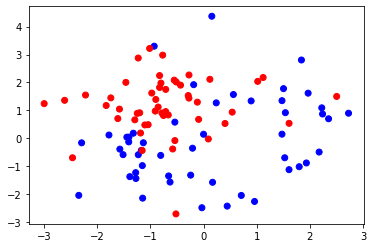

In [3]:
x, y = make_classification(n_samples=100, 
                           n_features=6,
                           n_informative=3, 
                           n_redundant=0, 
                           n_repeated=3, 
                           n_classes=2, 
                           n_clusters_per_class=2, 
                           weights=None, 
                           flip_y=0.01, 
                           class_sep=1.0, 
                           hypercube=True, 
                           shift=0.0, 
                           scale=1.0, 
                           shuffle=True, 
                           random_state=2022)

colors = ['red', 'blue']

plt.scatter(x[:,1],x[:,3], c=y, cmap=matplotlib.colors.ListedColormap(colors))

In [4]:
gmm4 = GMM(n_components=2, covariance_type='full', random_state=0).fit(x)

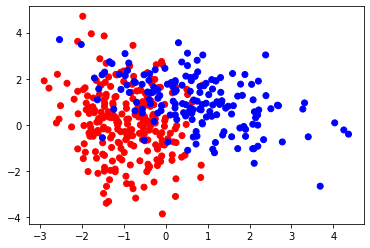

In [5]:
xnew, ynew = gmm4.sample(400)

colors = ['red', 'blue']

plt.scatter(xnew[:,1],xnew[:,3], c=ynew, cmap=matplotlib.colors.ListedColormap(colors))

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import svm


X_train, X_test, y_train, y_test = train_test_split(xnew, ynew, test_size=0.2)


clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

for i in [X_test]:
  y_guess = clf.predict_proba(X_test)
  print(i)
  print(y_guess)

[[ 2.45523978e-01  2.47036910e-01  3.36802420e+00 -7.61429639e-01
   3.36657051e+00  2.46181040e-01]
 [-4.12423775e-01 -4.12467698e-01  2.33752947e+00 -1.88913554e+00
   2.33726561e+00 -4.11923664e-01]
 [-1.07629216e+00 -1.07600090e+00  1.50049180e+00  2.27953689e+00
   1.49945505e+00 -1.07600041e+00]
 [-1.54202393e+00 -1.54215364e+00  8.75606993e-01  5.51080312e-01
   8.73938882e-01 -1.54211489e+00]
 [-2.46343641e-02 -2.42338567e-02  1.89195958e+00  8.91283324e-01
   1.89221706e+00 -2.32859302e-02]
 [ 1.32613305e+00  1.32590382e+00 -2.27179938e+00  9.32771624e-01
  -2.27124320e+00  1.32539648e+00]
 [-2.95792897e-01 -2.94829299e-01  5.00339501e-01  4.55794894e-01
   4.99353102e-01 -2.96747385e-01]
 [-1.78740075e+00 -1.78707827e+00 -1.61704918e-03 -1.30986376e-01
  -1.34673153e-04 -1.78609137e+00]
 [-1.65823937e+00 -1.65763927e+00  7.84913311e-01  1.92924114e+00
   7.85435669e-01 -1.65822022e+00]
 [-1.18239552e+00 -1.18382780e+00 -5.14758229e-01  3.09223220e-01
  -5.13504737e-01 -1.1835

In [7]:
# # Feature importance dataframe
# import pandas as pd 

# imp_df = pd.DataFrame({'feature': X_train.columns.values,
#                        'importance': model.feature_importances_})
 
# # Reorder by importance
# ordered_df = imp_df.sort_values(by='importance')
# imp_range=range(1,len(imp_df.index)+1)
 
# ## Barplot with confidence intervals
# height = ordered_df['importance']
# bars = ordered_df['feature']
# y_pos = np.arange(len(bars))

# # Create horizontal bars
# plt.barh(y_pos, height)
 
# # Create names on the y-axis
# plt.yticks(y_pos, bars)

# plt.xlabel("Mean reduction in tree impurity in random forest")

# plt.tight_layout()
# # Show graphic
# plt.show()

In [8]:
!pip install lime shap

     |████████████████████████████████| 275 kB 6.6 MB/s 
     |████████████████████████████████| 564 kB 6.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=8ba81dfb196000a9f1a74a33b469321dfc6da9dccc1be1274e181f2331803186
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


Intercept 0.5494976141184997
Prediction_local [0.0342847]
Right: 0.011089004490820469


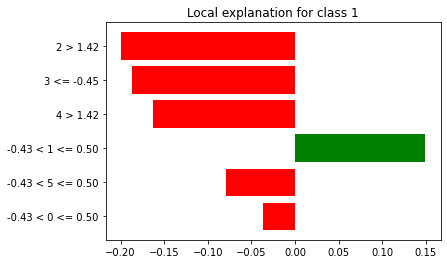

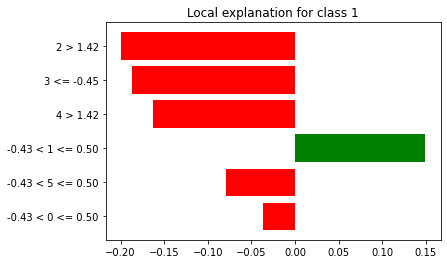

In [9]:
import lime
import lime.lime_tabular


explainer = lime.lime_tabular.LimeTabularExplainer(np.array(xnew),
            # feature_names=X.columns, 
            # class_names=['quality'], 
            discretize_continuous=True,
            verbose=True,
            mode='classification',
            random_state=2022
          )

exp = explainer.explain_instance(X_test[1], clf.predict_proba, num_features=6, num_samples=80)
exp.as_pyplot_figure()

In [10]:
import shap
data_train = shap.sample(X_train,100)
exp = shap.KernelExplainer(clf.predict_proba, data_train)



In [11]:
vals = exp.shap_values(data_train, nsamples = 50)
print("SHAP values: ", vals)

  0%|          | 0/100 [00:00<?, ?it/s]

SHAP values:  [array([[ 3.56632625e-02,  2.80842486e-02,  1.32980483e-01,
         5.60663506e-02,  1.36083987e-01,  3.45116607e-02],
       [-8.15743478e-02, -6.39105632e-02, -1.87875792e-01,
         2.74908538e-02, -1.86978850e-01, -7.07459587e-02],
       [ 1.12161041e-01,  1.09835548e-01, -5.95541912e-02,
        -1.55582251e-01, -6.81252749e-02,  1.13701050e-01],
       [-7.22661478e-02, -7.10060929e-02, -1.69527831e-01,
        -1.80885624e-02, -1.62265585e-01, -7.25126587e-02],
       [ 9.94553501e-02,  1.10162040e-01, -1.98761938e-02,
         6.47635353e-02, -2.98577865e-02,  9.35658249e-02],
       [ 7.45363650e-03,  1.05156422e-02,  2.14079695e-01,
        -6.36998787e-02,  2.21359227e-01, -7.19085229e-04],
       [-5.73814621e-02, -4.07044800e-02, -7.52785945e-02,
        -2.34581021e-01, -7.94545005e-02, -5.26944840e-02],
       [ 7.74870727e-02,  6.70408284e-02,  1.81651757e-02,
         9.18084092e-02,  3.00339374e-02,  6.22357969e-02],
       [-7.65854084e-02, -7.74994

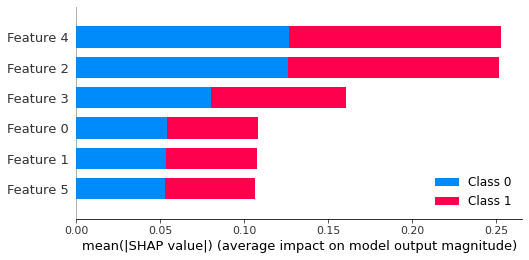

In [12]:
data = shap.sample(X_test,100)
shap.summary_plot(vals, plot_type='bar')


In [13]:
# Code execution using notebookjs
!pip install notebookjs

from notebookjs import execute_js
import glob
import pandas as pd
import random
import json


# Setting up D3 URL
d3_lib_url = "https://d3js.org/d3.v3.min.js"



In [14]:
js_string = """
function build(){
  communication = new CommAPI("addbuttonbehavior", (ret) => {

  var data = { "1" : [1,2,3], "2" : [4,5,6], "3" : [7,8,9] }
  var body = d3.select('body')

  body.append('select')
    .on('change',getData)
    .selectAll('option')
      .data(d3.keys(data))
      .enter()
    .append('option')
      .attr('value',function (d) { return d; })
      .text(function (d) { return d; })
      

  body.selectAll('p')
      .data(data.blue)
      .enter()
    .append('p')
      .text(function (d) { return d; })
      
  function getData() {
    var selectValue = d3.select('select').property('value')
    var data2 = d3.values(data[selectValue])
    body.selectAll('p')
        .data(data2)
        .text(function (d) { return d; })
    communication.call({ 'c': selectValue });
    run_scatter(c)
  }

  });
  communication.call({ 'c': 0 });
}
"""

In [15]:
execute_js([js_string, d3_lib_url], "build", callbacks={"addbuttonbehavior": run_scatter}) 


NameError: ignored

In [ ]:

def handle(data):
  c = data


def run_scatter(c):
  x, y = make_classification(n_samples=100, 
                            n_features=6,
                            n_informative=6-int(c['c']), 
                            n_redundant=0, 
                            n_repeated=int(c['c']), 
                            n_classes=2, 
                            n_clusters_per_class=2, 
                            weights=None, 
                            flip_y=0.01, 
                            class_sep=1.0, 
                            hypercube=True, 
                            shift=0.0, 
                            scale=1.0, 
                            shuffle=True, 
                            random_state=2022)

  colors = ['red', 'blue']

  plt.scatter(x[:,1],x[:,3], c=y, cmap=matplotlib.colors.ListedColormap(colors))

In [20]:
#Correlated features test
#https://queirozf.com/entries/scikit-learn-examples-making-dummy-dataset
#https://github.com/slundberg/shap/issues/1120

# x, y = make_classification(n_samples=10000, 
#     n_features=25,
#     n_informative=2, 
#     n_redundant=23,
#     shuffle=False) 

# x, y = make_classification(n_samples=10000, 
#     n_features=25,
#     n_informative=25, 
#     n_redundant=0,
#     shuffle=False) 

x, y = make_classification(n_samples=10000, 
    n_features=25,
    n_informative=2, 
    n_redundant=10,
    n_repeated=13,
    shuffle=False)

gmm4 = GMM(n_components=2, covariance_type='full', random_state=0).fit(x)
print(gmm4)
xnew, ynew = gmm4.sample(400)
print(xnew)

X_train, X_test, y_train, y_test = train_test_split(xnew, ynew, test_size=0.2)

clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

GaussianMixture(n_components=2, random_state=0)
[[ 0.00868356 -1.89589163 -1.8638715  ... -1.89623994 -0.05932254
   1.67739069]
 [ 0.84947773 -0.16052881 -0.19839698 ... -0.16056661 -0.29881888
   0.32479704]
 [-0.45844926  1.60382878  1.60120747 ...  1.6017942   0.20623914
  -1.51696774]
 ...
 [ 1.08665335 -1.14083808 -1.17806055 ... -1.14086034 -0.41095886
   1.24326159]
 [ 0.42447403 -1.19662724 -1.19982442 ... -1.1973422  -0.1823856
   1.15044308]
 [-0.08022653 -0.71963171 -0.70558263 ... -0.72076205  0.00526705
   0.62042176]]


SVC(probability=True)

In [19]:
import matplotlib.pyplot as plt

features = ["Feature_"+str(i) for i in range(25)]

# Feature importance dataframe
imp_df = pd.DataFrame({'feature': features,
                       'importance': clf.feature_importances_})
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='importance')
imp_range=range(1,len(imp_df.index)+1)
 
## Barplot with confidence intervals
height = ordered_df['importance']
bars = ordered_df['feature']
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Mean reduction in tree impurity in random forest")

plt.tight_layout()
# Show graphic
plt.show()

AttributeError: ignored

Intercept 0.14497471621711022
Prediction_local [0.13939399]
Right: 0.10304889237805405


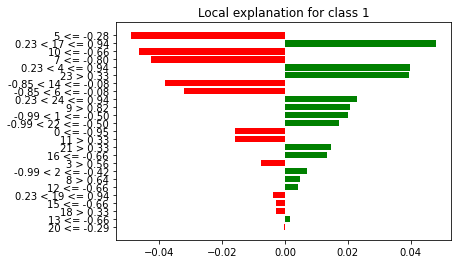

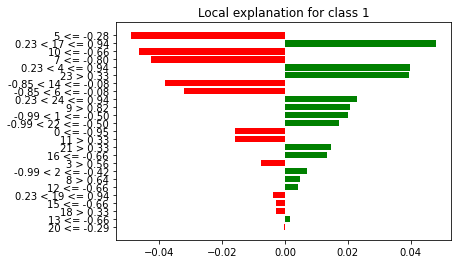

In [23]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(xnew),
            # feature_names=X.columns, 
            # class_names=['quality'], 
            discretize_continuous=True,
            verbose=True,
            mode='classification',
            random_state=2022
          )

exp = explainer.explain_instance(X_test[1], clf.predict_proba, num_features=25, num_samples=80)
exp.as_pyplot_figure()

  0%|          | 0/100 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

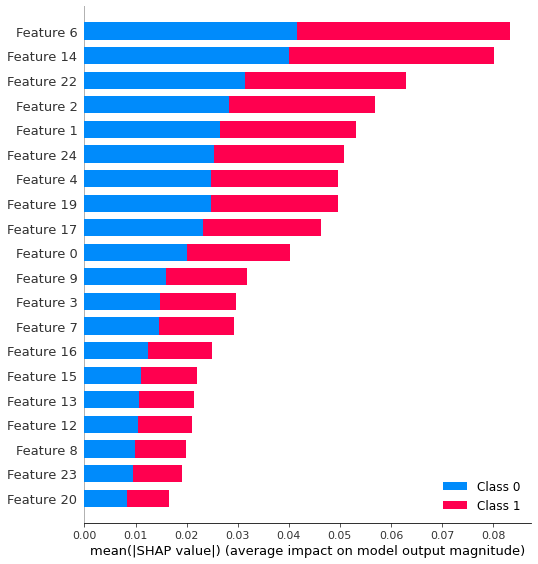

In [24]:
data_train = shap.sample(X_train,100)
exp = shap.KernelExplainer(clf.predict_proba, data_train)
# data = shap.sample(X_test,100)
vals = exp.shap_values(data_train, nsamples = 50)
shap.summary_plot(vals, plot_type='bar')


In [ ]:
print("SHAP values: ", vals[0])

SHAP values:  [[ 0.          0.          0.         ...  0.11645189  0.
   0.03411458]
 [ 0.05283868  0.         -0.03053807 ...  0.0249016   0.01030764
   0.        ]
 [ 0.08935007 -0.03616651  0.02267147 ... -0.0138607  -0.11494946
  -0.05539053]
 ...
 [-0.08602281  0.         -0.02554373 ... -0.0901845   0.
   0.        ]
 [-0.13947627  0.05496085  0.         ... -0.18098241  0.
   0.        ]
 [ 0.15678784  0.          0.00765486 ...  0.          0.
   0.01585687]]
